# Embed MNIST digits into 2 dimensions

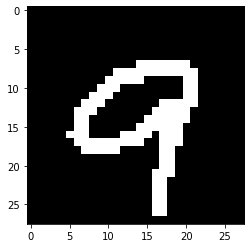

In [1]:
import tensorflow as tf
import numpy as np
import random
import matplotlib.pyplot as plt

ds, _ = tf.keras.datasets.mnist.load_data()

choose = 500

ds = list(zip(*ds))
random.shuffle(ds)
X, y = list(zip(*ds[:choose]))

X = np.reshape((np.array(X) / 255 >= 0.5).astype(np.float32), (choose, 1, 28, 28, 1))

plt.imshow(X[0][0], interpolation='nearest')
plt.gray()
plt.show()

In [2]:
from saepipe import EmbeddingPipeline

pipeline = EmbeddingPipeline()
pipeline.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
pipeline.add(tf.keras.layers.MaxPooling2D())
pipeline.add(tf.keras.layers.Conv2D(32, (3, 3), activation="relu"))
pipeline.add(tf.keras.layers.MaxPooling2D())
pipeline.add(tf.keras.layers.Flatten())
pipeline.add(tf.keras.layers.Dense(64, activation="relu"))
pipeline.add(tf.keras.layers.Dense(2))

# Define difference as percent pixel difference between images
difference = lambda a, b: np.sum(np.abs(a - b)) / 784

pipeline.compile(optimizer='adam', loss='mean_squared_error')
pipeline.fit(difference, X, epochs=5, sample_size=100)

Epoch 1/5
50000/50000 [==============================] - 96s 2ms/step
Total loss: 288.8285827636719
Epoch 2/5
50000/50000 [==============================] - 103s 2ms/step
Total loss: 223.9971466064453
Epoch 3/5
50000/50000 [==============================] - 105s 2ms/step
Total loss: 215.00648498535156
Epoch 4/5
50000/50000 [==============================] - 111s 2ms/step
Total loss: 212.78561401367188
Epoch 5/5
50000/50000 [==============================] - 112s 2ms/step
Total loss: 209.75460815429688


<Figure size 432x288 with 0 Axes>

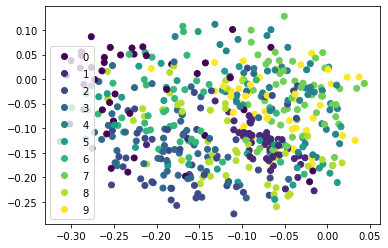

In [3]:
X_embed = np.array([pipeline.predict(x)[0] for x in X])

plt.set_cmap('viridis')
fig = plt.figure()
ax = fig.add_subplot()
scatter = ax.scatter(X_embed[:, 0], X_embed[:, 1], c=y)
ax.legend(*scatter.legend_elements())
plt.show()